# Mobile price classification 
### Problem at hand is about classifying mobile prices in class 0,1,2,3.
##### The train and test datasets used in the problems are from https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import metrics

from sklearn.metrics import classification_report

%matplotlib inline

/home/tejas/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Reading training dataset
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [5]:
# number of classes in dataset
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [6]:
# Splitting data in dependent variables X an independent variables y
X = df.loc[:,'battery_power':'wifi']
y = df.loc[:,'price_range']

In [7]:
#Splitting data in training and testing set
X_train,X_test,y_train,y_test= train_test_split(X, y, train_size=0.7, test_size= 0.3)

## Decision Tree

In [8]:
shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=100)

In [9]:
shallow_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [10]:
# This will predict the the label
y_pred_dt1 = shallow_tree.predict(X_test)

dt_accuracy = metrics.accuracy_score(y_test, y_pred_dt1)
print('This decision tree has accuracy rate of', dt_accuracy)

This decision tree has accuracy rate of 0.748333333333


In [11]:
confusion_dt = metrics.confusion_matrix( y_test, y_pred_dt1)
confusion_dt

array([[118,  40,   0,   0],
       [  9, 122,  22,   0],
       [  0,  32,  81,  28],
       [  0,   0,  20, 128]])

In [12]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot, graphviz

# Putting features
features = list(X.columns)
len(features)

20

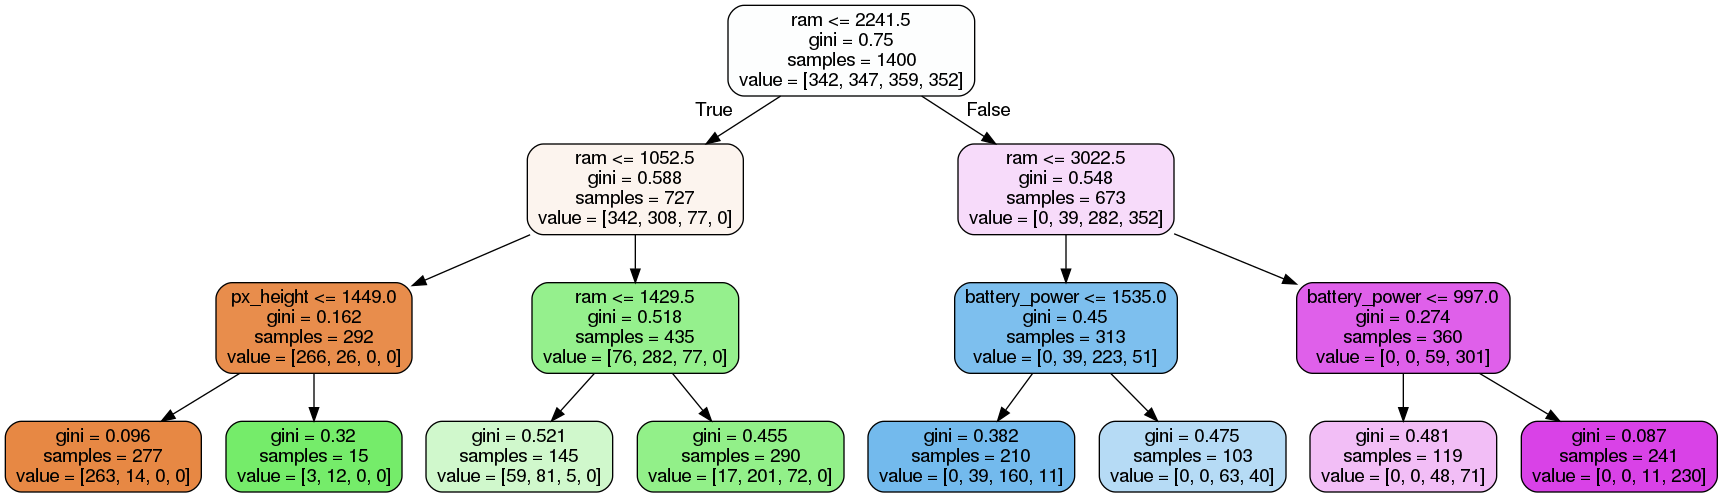

In [13]:
dot_data = StringIO()  
export_graphviz(shallow_tree, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Random Forest

### Random Forest with default hyperparameters

In [14]:
rfc1= RandomForestClassifier()

In [15]:
# fit
rfc1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
# This will predict the the label
y_pred_rf11 = rfc1.predict(X_test)



rf1_accuracy = metrics.accuracy_score(y_test, y_pred_rf11)
print('This decision tree has accuracy rate of',rf1_accuracy)

This decision tree has accuracy rate of 0.801666666667


In [17]:
confusion_rf1 = metrics.confusion_matrix( y_test, y_pred_rf11)
confusion_rf1

array([[143,  14,   1,   0],
       [ 22, 106,  25,   0],
       [  0,  21, 105,  15],
       [  0,   0,  21, 127]])

In [18]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred_rf11))

             precision    recall  f1-score   support

          0       0.87      0.91      0.89       158
          1       0.75      0.69      0.72       153
          2       0.69      0.74      0.72       141
          3       0.89      0.86      0.88       148

avg / total       0.80      0.80      0.80       600



### Finding optimal hyperparameters

In [19]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,6,8,10],
    'n_estimators': [100,200, 300, 400, 500], 
    'max_features': [4,8,12,16,20]
    
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [20]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 6, 8, 10], 'n_estimators': [100, 200, 300, 400, 500], 'max_features': [4, 8, 12, 16, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [21]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.883571428571 using {'max_depth': 10, 'max_features': 8, 'n_estimators': 300}


#### Evaluating model with optimal hyperparameters

In [22]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,                             
                             max_features=12,
                             n_estimators=500)

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
predictions = rfc.predict(X_test)

In [25]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.92      0.96      0.93       158
          1       0.89      0.82      0.85       153
          2       0.83      0.84      0.84       141
          3       0.91      0.93      0.92       148

avg / total       0.89      0.89      0.89       600



In [26]:
print(metrics.confusion_matrix(y_test,predictions))

[[151   7   0   0]
 [ 14 126  13   0]
 [  0   9 119  13]
 [  0   0  11 137]]


In [27]:
y_pred_rfc = rfc.predict(X_test)



rfc_accuracy = metrics.accuracy_score(y_test, y_pred_rfc)
print('This decision tree has accuracy rate of',rfc_accuracy)

This decision tree has accuracy rate of 0.888333333333


## XgBoost

### XgBoost with default hyperparameters

In [28]:
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [29]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred_xg1 = model_xg.predict(X_test)

xg_accuracy = metrics.accuracy_score(y_test, y_pred_xg1)
print('This XGBoost model gives has accuracy rate of',xg_accuracy)

This XGBoost model gives has accuracy rate of 0.888333333333


In [30]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3, 0.4,0.5, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=3)

# set up GridSearchCV()
xgb_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      


In [31]:
xgb_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   21.2s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [32]:
print('We can get accuracy of',xgb_cv.best_score_,'using',xgb_cv.best_params_)

We can get accuracy of 0.912142857143 using {'learning_rate': 0.4, 'subsample': 0.9}


In [33]:
xg_cv_results = pd.DataFrame(xgb_cv.cv_results_)
xg_cv_results['param_learning_rate'] = xg_cv_results['param_learning_rate'].astype('float')


In [34]:
params = {'learning_rate': 0.2,
          'subsample':0.6,
         }

# fit model on training data
xg_final = XGBClassifier(params = params)
xg_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob',
       params={'learning_rate': 0.2, 'subsample': 0.6}, random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [35]:
y_pred_xgb = xg_final.predict(X_test)

xgb_final_accuracy = metrics.accuracy_score(y_test, y_pred_xgb)

print('This XGBoost model gives has accuracy rate of',xgb_final_accuracy)

This XGBoost model gives has accuracy rate of 0.888333333333


###  _From models above, we managed to get maximum accuracy of 89.5 with XgBoost. Lets predict different the labels for test dataset using XgBoost and assign each mobile to a particular dataset._


## Predictiong class labels for test dataset

In [36]:
test = pd.read_csv('test.csv')

In [37]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [38]:
# As our training dataset didn't have 'id' column, for prediction we will use dataset without column 'id'.
id_col = test['id']
id_col = pd.DataFrame(id_col,columns=['id'])

In [39]:
test = test.drop('id', axis=1)

In [40]:
# Predicting class labels with XgBoost for test dataset
test_label = xg_final.predict(test)
# Converting series of preicted labels to a pandas dataframe 
test_label_df = pd.DataFrame(test_label,columns=['predicted_labels'])
test_label_df.head()

,predicted_labels
0,3
1,3
2,3
3,3
4,1


In [41]:
final_test_df= pd.concat([id_col,test,test_label_df], axis=1)

In [42]:
final_test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_labels
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,3
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
